DESENVOLVER E SELECIONAR O MELHOR ALGORITMO DE MACHINE LEARNING DE REGRESSÃO LISTADOS AQUI ABAIXO: 

- Regressão linear (x)
- Regressão linear Multiplo (x)
- Regressão com Árvore de Decisão (x)
- Regressão com Random Forest (x)
- Regressão com XGBOOST (x)
- Regressão com LIGHT GBM (x)
- Regressão com CATBOOST (x)

De acordo com os resultados abaixo o algoritmo que obteve o melhor desempenho foi a Regressão com LIGHT GBM com 85.75 % 

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('insurance.csv', sep=',' , encoding='iso-8859-1')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.shape

(1338, 7)

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
from sklearn.preprocessing import LabelEncoder

df.iloc[:,1] = LabelEncoder().fit_transform(df.iloc[:,1])
df.iloc[:,4] = LabelEncoder().fit_transform(df.iloc[:,4])
df.iloc[:,5] = LabelEncoder().fit_transform(df.iloc[:,5])

In [10]:
df.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


In [11]:
# Escalonamento dos previsores

from sklearn.preprocessing import StandardScaler

df_esc = StandardScaler().fit_transform(df)

In [12]:
df_esc

array([[-1.43876426, -1.0105187 , -0.45332   , ...,  1.97058663,
         1.34390459,  0.2985838 ],
       [-1.50996545,  0.98959079,  0.5096211 , ..., -0.5074631 ,
         0.43849455, -0.95368917],
       [-0.79795355,  0.98959079,  0.38330685, ..., -0.5074631 ,
         0.43849455, -0.72867467],
       ...,
       [-1.50996545, -1.0105187 ,  1.0148781 , ..., -0.5074631 ,
         0.43849455, -0.96159623],
       [-1.29636188, -1.0105187 , -0.79781341, ..., -0.5074631 ,
         1.34390459, -0.93036151],
       [ 1.55168573, -1.0105187 , -0.26138796, ...,  1.97058663,
        -0.46691549,  1.31105347]])

In [13]:
import plotly.express as px

boxplot = px.box(df, y="bmi")
boxplot.show()

In [14]:
boxplot = px.box(df, y="charges")
boxplot.show()

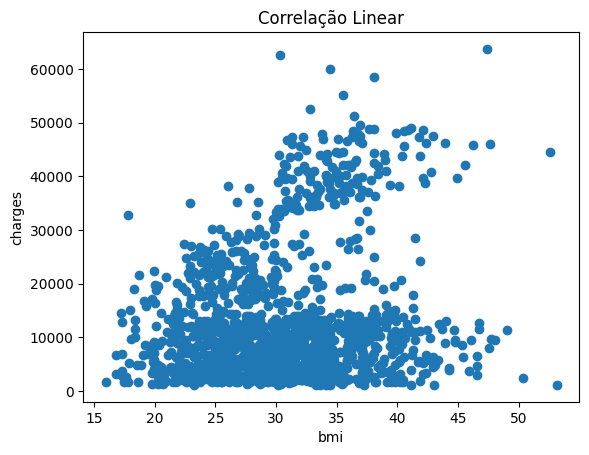

In [15]:
# Gráfico de Dispersão

import matplotlib.pyplot as plt

plt.scatter(df.bmi, df.charges)
plt.title('Correlação Linear')
plt.xlabel('bmi')
plt.ylabel('charges')
plt.grid(False)

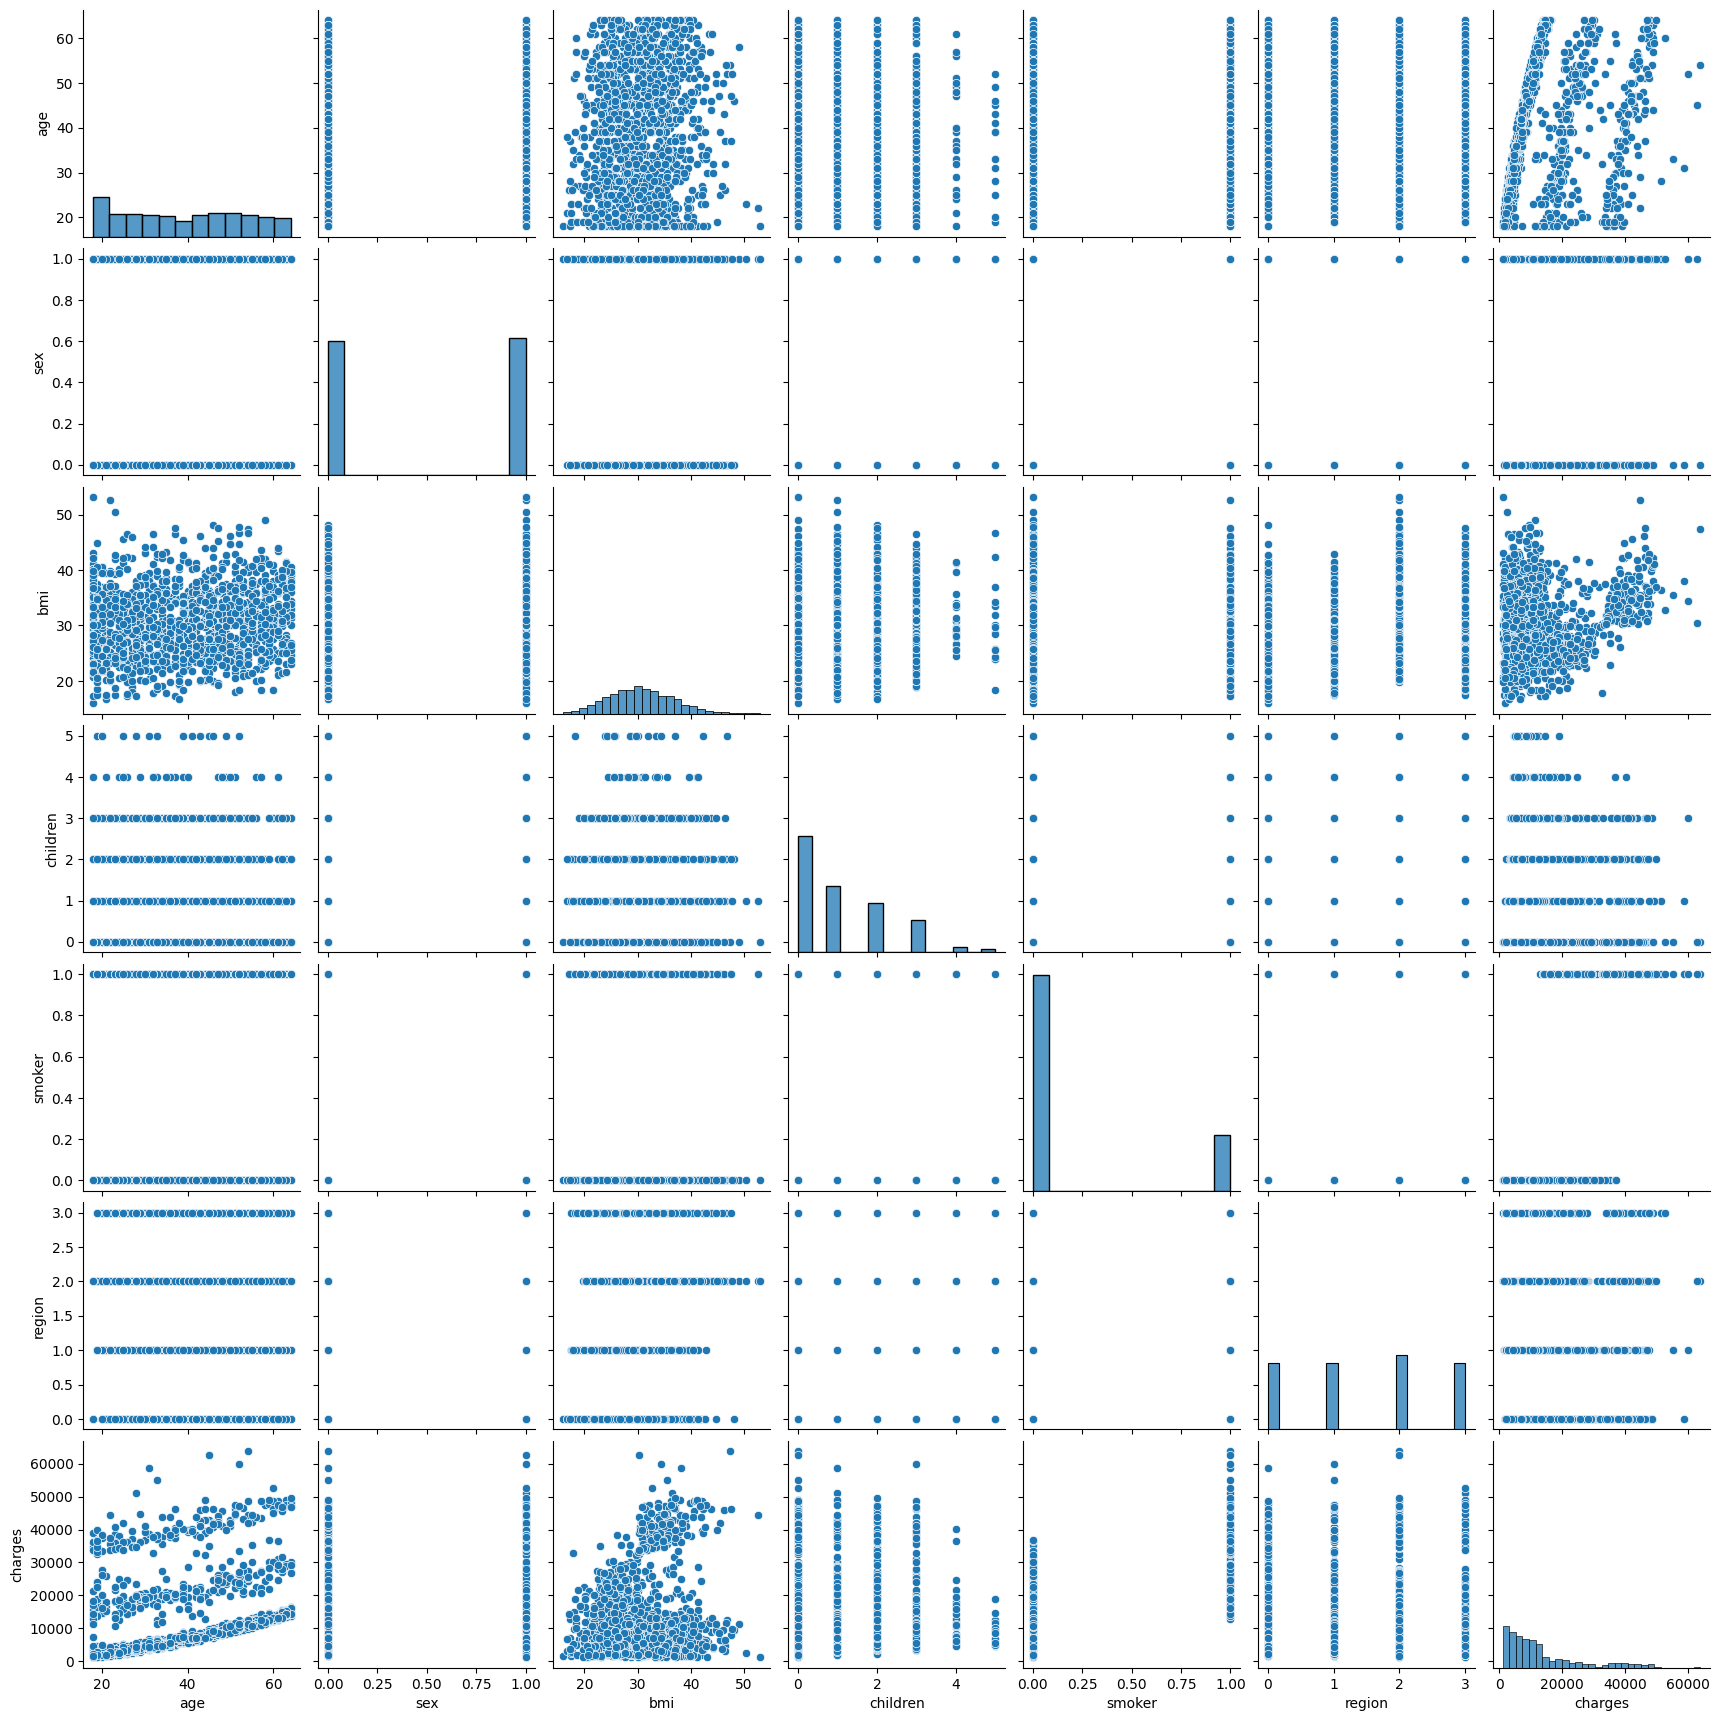

In [16]:
import seaborn as sns

sns.pairplot(df)

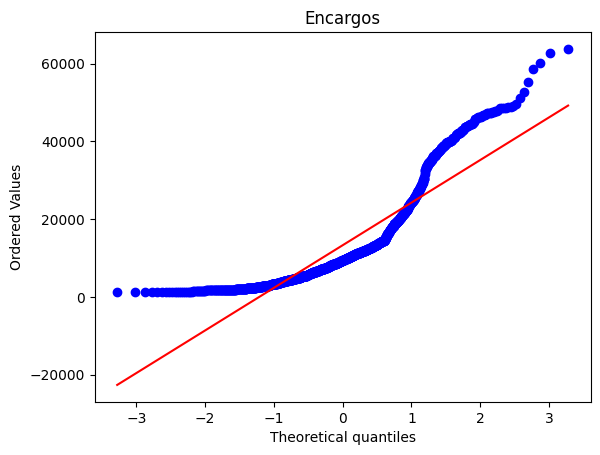

In [17]:
import scipy.stats as stats

stats.probplot(df['charges'], dist="norm", plot=plt)
plt.title("Encargos")
plt.show()

In [18]:
import plotly.express as px

hist =  px.histogram (df,  x = "charges", nbins=60) 
hist.update_layout(width=800,height=500,title_text='Encargos') 
hist.show()

In [19]:
# Teste de Shapiro-Wilk : Verificar a distribuição normal

stats.shapiro(df.charges)

ShapiroResult(statistic=0.8146881157362383, pvalue=1.1505226334932036e-36)

In [20]:
stats.shapiro(df.age)

ShapiroResult(statistic=0.9447009637825445, pvalue=5.69204692845418e-22)

In [21]:
stats.shapiro(df.sex)

ShapiroResult(statistic=0.6365630750539505, pvalue=1.4423508345140056e-46)

In [22]:
stats.shapiro(df.bmi)

ShapiroResult(statistic=0.9938864621676107, pvalue=2.6046836879834408e-05)

In [23]:
stats.shapiro(df.children)

ShapiroResult(statistic=0.823180467362945, pvalue=5.066436570900864e-36)

In [24]:
stats.shapiro(df.smoker)

ShapiroResult(statistic=0.4950332425408406, pvalue=7.535159039209903e-52)

In [25]:
stats.shapiro(df.region)

ShapiroResult(statistic=0.8594500079820142, pvalue=5.8794676449598024e-33)

In [26]:
# Teste Lilliefors (Kolmogorov_Sminorv): Verificar Distribuição Nominal

import statsmodels
from statsmodels.stats.diagnostic import lilliefors

estatistica, p = statsmodels.stats.diagnostic.lilliefors(df.charges, dist = 'norm')
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 0.18846450965981876
p-valor: 0.0009999999999998899


In [27]:
# CORRELAÇÃO LINEAR 

# Spearman
coef,p = stats.spearmanr(df.charges, df.bmi)
print('Coeficiente de correlação: {}'.format(coef))
print('p-valor: {}'.format(p))

Coeficiente de correlação: 0.11939590358331147
p-valor: 1.1926059544526826e-05


In [28]:
correlacoes = df.corr(method='spearman')
correlacoes

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020809,0.107736,0.056992,-0.025210,0.004315,0.534392
sex,-0.020809,1.000000,0.044802,0.015589,0.076185,0.004614,0.009490
bmi,0.107736,0.044802,1.000000,0.015607,0.002203,0.152959,0.119396
children,0.056992,0.015589,0.015607,1.000000,0.016583,0.010604,0.133339
smoker,-0.025210,0.076185,0.002203,0.016583,1.000000,-0.002155,0.663460
region,0.004315,0.004614,0.152959,0.010604,-0.002155,1.000000,-0.043531
charges,0.534392,0.009490,0.119396,0.133339,0.663460,-0.043531,1.000000


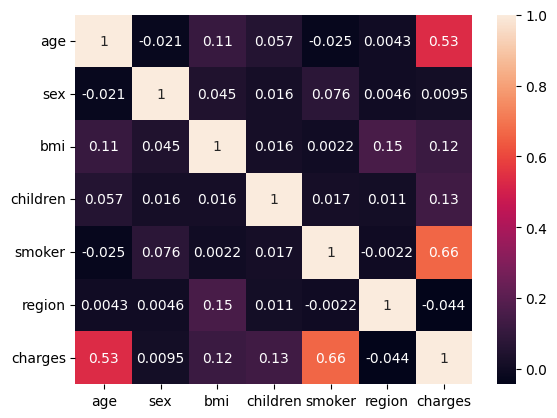

In [29]:
plt.figure()
sns.heatmap(correlacoes, annot=True);

REGRESSÃO LINEAR SIMPLES

In [30]:
x1 = df.iloc[:, 2:3].values
x1

array([[27.9 ],
       [33.77],
       [33.  ],
       ...,
       [36.85],
       [25.8 ],
       [29.07]])

In [31]:
y = df.iloc[:, 6:7].values
y

array([[16884.924 ],
       [ 1725.5523],
       [ 4449.462 ],
       ...,
       [ 1629.8335],
       [ 2007.945 ],
       [29141.3603]])

In [32]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x1, y, test_size = 0.3, random_state = 10)

In [33]:
x_treino.shape, x_teste.shape

((936, 1), (402, 1))

In [34]:
y_treino.shape, y_teste.shape

((936, 1), (402, 1))

In [35]:
from sklearn.linear_model import LinearRegression

reg_linear1 = LinearRegression()
reg_linear1.fit(x_treino, y_treino)

LinearRegression()

In [36]:
# Intercepto (coeficiente linear)

reg_linear1.intercept_

array([84.68050485])

In [37]:
# Coeficiente Angular

reg_linear1.coef_

array([[433.29493259]])

In [38]:
# Coeficiente de Determinação dados de treino

reg_linear1.score(x_treino, y_treino)

0.04731455322378331

In [39]:
# Coeficiente de Determinação dados de teste

reg_linear1.score(x_teste, y_teste)

0.013821597073977787

In [40]:
previ_treino_regress1 = reg_linear1.predict(x_treino)
previ_treino_regress1

array([[ 7370.5347963 ],
       [16575.88563912],
       [19019.66905891],
       [13525.4893137 ],
       [12021.95589763],
       [13382.50198595],
       [14296.75429371],
       [14669.38793574],
       [11263.6897656 ],
       [15765.62411518],
       [13133.35739971],
       [12063.11891622],
       [10856.39252897],
       [ 9305.1966703 ],
       [12216.93861729],
       [13133.35739971],
       [12268.9340092 ],
       [16385.23586878],
       [12351.26004639],
       [13300.17594876],
       [19769.26929229],
       [12063.11891622],
       [15891.27964563],
       [11445.67363729],
       [15033.35567911],
       [ 9922.64194924],
       [14860.03770607],
       [10189.11833278],
       [12606.90405662],
       [12968.70532533],
       [11220.36027234],
       [17576.7969334 ],
       [15932.44266423],
       [14862.20418074],
       [13298.0094741 ],
       [16549.88794316],
       [10745.90232116],
       [14862.20418074],
       [15423.32111844],
       [11618.99161032],


Para Regressão Linear Simples o aprendizado não teve sucesso para nenhum dos atributos.

Regressão Linear Multipla

In [41]:
independente = df.iloc[:, 0:6].values
independente

array([[19, 0, 27.9, 0, 1, 3],
       [18, 1, 33.77, 1, 0, 2],
       [28, 1, 33.0, 3, 0, 2],
       ...,
       [18, 0, 36.85, 0, 0, 2],
       [21, 0, 25.8, 0, 0, 3],
       [61, 0, 29.07, 0, 1, 1]], dtype=object)

In [42]:
dependente = df.iloc[:, 6:7].values
dependente

array([[16884.924 ],
       [ 1725.5523],
       [ 4449.462 ],
       ...,
       [ 1629.8335],
       [ 2007.945 ],
       [29141.3603]])

In [43]:
from sklearn.model_selection import train_test_split
xm_treino, xm_teste, ym_treino, ym_teste = train_test_split(independente, dependente, test_size = 0.3, random_state = 0)

In [44]:
multipla = LinearRegression()
multipla.fit(xm_treino, ym_treino)

LinearRegression()

In [45]:
multipla.intercept_

array([-11827.7331418])

In [46]:
multipla.coef_

array([[  256.5772619 ,   -49.39232379,   329.02381564,   479.08499828,
        23400.28378787,  -276.31576201]])

In [47]:
# Coeficiente de Determinação

multipla.score(xm_treino, ym_treino)

0.7306840408360217

In [48]:
print("Equação: Valor = {:.2f} + ({:.2f})*age + ({:.2f})*sex + ({:.2f})*bmi + ({:.2f})*children + ({:.2f})*smoker + ({:.2f})*region".format(
    multipla.intercept_[0], multipla.coef_[0][0], multipla.coef_[0][1], multipla.coef_[0][2], multipla.coef_[0][3], multipla.coef_[0][4], multipla.coef_[0][5]))


Equação: Valor = -11827.73 + (256.58)*age + (-49.39)*sex + (329.02)*bmi + (479.08)*children + (23400.28)*smoker + (-276.32)*region


In [49]:
# Teste da Regressão multipla

previsoes_multipla = multipla.predict(xm_teste)
previsoes_multipla

array([[11051.54909755],
       [ 9821.28110689],
       [37867.57220923],
       [16125.70579228],
       [ 6920.27132517],
       [ 3879.38549816],
       [ 1448.91928088],
       [14390.17797974],
       [ 9022.95151353],
       [ 7458.83371884],
       [ 4584.60125463],
       [10309.9886336 ],
       [ 8693.03891958],
       [ 4085.25393494],
       [27551.60737718],
       [11151.0640722 ],
       [11243.0536825 ],
       [ 5962.9521121 ],
       [ 8181.9015666 ],
       [26750.7993431 ],
       [33448.59842228],
       [14350.03320383],
       [11672.89478465],
       [32235.7832204 ],
       [ 4326.07702625],
       [ 9096.53607025],
       [ 1045.25196369],
       [10177.76672094],
       [ 4042.60346751],
       [10384.28681219],
       [ 9035.98983755],
       [40123.71002379],
       [15507.20819083],
       [13678.264976  ],
       [24481.97362849],
       [ 5059.21988589],
       [12889.80609711],
       [30333.92625689],
       [33301.25091403],
       [ 3431.35787088],


In [50]:
ym_teste

array([[ 9724.53    ],
       [ 8547.6913  ],
       [45702.02235 ],
       [12950.0712  ],
       [ 9644.2525  ],
       [ 4500.33925 ],
       [ 2198.18985 ],
       [11436.73815 ],
       [ 7537.1639  ],
       [ 5425.02335 ],
       [ 6753.038   ],
       [10493.9458  ],
       [ 7337.748   ],
       [ 4185.0979  ],
       [18310.742   ],
       [10702.6424  ],
       [12523.6048  ],
       [ 3490.5491  ],
       [ 6457.8434  ],
       [33475.81715 ],
       [23967.38305 ],
       [12643.3778  ],
       [23045.56616 ],
       [23065.4207  ],
       [ 1674.6323  ],
       [ 4667.60765 ],
       [ 3732.6251  ],
       [ 7682.67    ],
       [ 3756.6216  ],
       [ 8413.46305 ],
       [ 8059.6791  ],
       [48970.2476  ],
       [12979.358   ],
       [20630.28351 ],
       [14571.8908  ],
       [ 4137.5227  ],
       [ 8347.1643  ],
       [51194.55914 ],
       [40003.33225 ],
       [ 1880.487   ],
       [ 5458.04645 ],
       [ 2867.1196  ],
       [20149.3229  ],
       [474

In [51]:
# Coeficiente de Determinação

multipla.score(xm_teste, ym_teste)

0.7911113876316933

In [52]:
# Métricas

# Erro absoluto
abs(ym_teste - previsoes_multipla).mean()

4013.692985781204

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Erro médio Absoluto
mean_absolute_error(ym_teste, previsoes_multipla)

4013.692985781204

In [54]:
# Erro quadrático médio
mean_squared_error(ym_teste, previsoes_multipla)

33311355.281859964

In [55]:
# Raiz do erro quadrático médio
np.sqrt(mean_squared_error(ym_teste, previsoes_multipla))

5771.599022962351

In [56]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Separando os dados em folds

kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [57]:
# Criando o modelo
from sklearn.linear_model import LinearRegression
modelo_multiplo = LinearRegression()
resultado_multiplo = cross_val_score(modelo_multiplo, independente, dependente, cv = kfold)
resultado_multiplo

array([0.80403115, 0.65635355, 0.81223444, 0.70626574, 0.72386761,
       0.64810671, 0.79500156, 0.56084118, 0.75978643, 0.79994218,
       0.72493994, 0.76469736, 0.77417662, 0.75945044, 0.75022414])

In [58]:
# Usamos a média e o desvio padrão
print("Coeficiente de Determinação Médio: %.2f%%" % (resultado_multiplo.mean() * 100.0))

Coeficiente de Determinação Médio: 73.60%


REGRESSÃO POR VETOR DE SUPORTE

In [59]:
# Biblioteca Regressão por vetor de suporte 
from sklearn.svm import SVR
SVR = SVR(kernel='rbf')
SVR.fit(x_treino,y_treino)

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR()

In [60]:
SVR.score(x_treino, y_treino)

-0.10698797199771115

In [61]:
SVR.score(x_teste, y_teste)

-0.09264571580577297

In [62]:
# Padronização de escala

from sklearn.preprocessing import StandardScaler
x_scaler = StandardScaler()
x_treino_scaler = x_scaler.fit_transform(x_treino)

In [63]:
x_treino_scaler

array([[-2.25446088],
       [ 1.16015992],
       [ 2.06665375],
       [ 0.0286499 ],
       [-0.52906882],
       [-0.02438963],
       [ 0.31474192],
       [ 0.45296616],
       [-0.81033907],
       [ 0.85960257],
       [-0.116807  ],
       [-0.51379986],
       [-0.96142137],
       [-1.53681993],
       [-0.45674218],
       [-0.116807  ],
       [-0.43745508],
       [ 1.08944054],
       [-0.40691717],
       [-0.05492755],
       [ 2.34470948],
       [-0.51379986],
       [ 0.90621307],
       [-0.74283421],
       [ 0.58797588],
       [-1.30778559],
       [ 0.52368553],
       [-1.20893919],
       [-0.31208891],
       [-0.17788283],
       [-0.82641165],
       [ 1.53143665],
       [ 0.92148203],
       [ 0.52448916],
       [-0.05573118],
       [ 1.15051637],
       [-1.00240646],
       [ 0.52448916],
       [ 0.73262915],
       [-0.67854386],
       [-0.16743564],
       [-1.61396834],
       [-0.3611103 ],
       [ 0.70771664],
       [-0.46799299],
       [-1

In [64]:
y_scaler = StandardScaler()
y_treino_scaler = y_scaler.fit_transform(y_treino.reshape(-1,1))

In [65]:
y_treino_scaler

array([[-8.29518932e-01],
       [-8.68083766e-01],
       [-1.51054584e-01],
       [ 2.53213175e-01],
       [-5.40719730e-01],
       [-6.02840990e-01],
       [-6.29234760e-01],
       [ 1.38238235e-01],
       [-9.23075509e-01],
       [ 4.65273396e-01],
       [ 2.42660232e-01],
       [-2.30258499e-01],
       [ 1.10296005e+00],
       [-7.38439059e-01],
       [-5.08094287e-01],
       [-4.06513947e-01],
       [ 7.16761230e-01],
       [ 1.91362848e+00],
       [ 3.24417672e-01],
       [-8.83855781e-01],
       [-5.72225434e-01],
       [-1.72855641e-01],
       [-9.78251259e-02],
       [ 6.51896208e-02],
       [ 3.02210249e-02],
       [-5.06297570e-01],
       [-3.47540035e-01],
       [-9.47032724e-01],
       [-6.06874100e-01],
       [ 1.50563840e+00],
       [ 3.62592118e-01],
       [ 2.45674474e+00],
       [-3.85443186e-01],
       [-5.91906241e-01],
       [ 1.26798995e-01],
       [-1.68013058e-01],
       [-8.66490330e-01],
       [ 2.40494754e+00],
       [-9.8

In [66]:
x_teste_scaler = x_scaler.transform(x_teste)
x_teste_scaler

array([[-0.49853091],
       [-0.63595151],
       [ 1.0058631 ],
       [-0.92606168],
       [-0.77337212],
       [ 0.1274963 ],
       [-1.04982059],
       [-0.64318418],
       [-1.10286012],
       [-1.73531636],
       [-1.13982707],
       [-0.33057239],
       [-0.77337212],
       [ 0.3717996 ],
       [ 0.81459933],
       [-1.0940202 ],
       [ 0.50600569],
       [ 1.43982291],
       [-0.58532287],
       [-0.45272404],
       [ 0.08168943],
       [ 0.69244768],
       [-0.72756525],
       [-0.57487569],
       [-0.69622371],
       [ 0.08168943],
       [ 1.0058631 ],
       [-1.50628202],
       [ 0.53975812],
       [-0.40852443],
       [-1.7746942 ],
       [ 0.71655656],
       [ 0.15240881],
       [-1.39939933],
       [ 1.30159867],
       [ 2.00879244],
       [-0.13207596],
       [ 0.94157276],
       [-0.55960673],
       [-0.5531777 ],
       [ 0.96568164],
       [-0.88025481],
       [-0.80391003],
       [ 0.90621307],
       [ 1.65519556],
       [-0

In [67]:
y_teste_scaler = y_scaler.transform(y_teste.reshape(-1,1))
y_teste_scaler

array([[-4.97571703e-01],
       [-6.60048583e-01],
       [-8.88421003e-02],
       [ 8.92780249e-01],
       [-7.83607744e-01],
       [-4.91385485e-01],
       [-2.95262214e-01],
       [ 2.93457045e-01],
       [-4.22566205e-01],
       [ 5.12341639e-01],
       [-8.36809769e-01],
       [-8.11933905e-01],
       [-5.33407442e-01],
       [-3.96166614e-01],
       [ 1.04440334e+00],
       [-3.51827898e-02],
       [-8.24704767e-01],
       [ 1.38926860e-01],
       [-1.91636054e-01],
       [ 5.91056978e-01],
       [ 2.10657598e+00],
       [-9.12831866e-01],
       [-9.07725366e-01],
       [-5.56185036e-01],
       [-7.34875172e-01],
       [-6.66527776e-02],
       [-4.60550320e-01],
       [-7.84997938e-02],
       [-7.63318276e-01],
       [ 6.15951286e-01],
       [-9.84911834e-01],
       [ 2.15074326e+00],
       [ 3.61559122e-01],
       [-4.15188622e-01],
       [-8.04994045e-01],
       [-6.13323223e-01],
       [-7.75824903e-03],
       [-3.47248435e-01],
       [ 9.8

In [68]:
from sklearn.svm import SVR
SVR2 = SVR(kernel='rbf')
SVR2.fit(x_treino_scaler, y_treino_scaler.ravel())

SVR()

In [69]:
SVR2.score(x_treino_scaler, y_treino_scaler)

-0.07746097079956171

In [70]:
# TESTE

SVR2.score(x_teste_scaler, y_teste_scaler)

-0.07316061310678856

In [71]:
previsoes_teste_SMVR = SVR2.predict(x_teste_scaler)
previsoes_teste_SMVR

array([-0.36067269, -0.35858337, -0.18703926, -0.3857967 , -0.36574704,
       -0.34854455, -0.40908122, -0.35870457, -0.42000644, -0.48169056,
       -0.42767984, -0.36930106, -0.36574704, -0.29325379, -0.19911918,
       -0.41817143, -0.25863887, -0.21171243, -0.35844762, -0.36274567,
       -0.35596342, -0.21744699, -0.3621867 , -0.35856478, -0.36043614,
       -0.35596342, -0.18703926, -0.48226904, -0.25031128, -0.36507209,
       -0.47930169, -0.2131996 , -0.3440191 , -0.47272186, -0.19991839,
       -0.22853975, -0.3737455 , -0.18888273, -0.35881753, -0.35895161,
       -0.18794138, -0.37856263, -0.36878001, -0.19082908, -0.22720586,
       -0.36372438, -0.47178022, -0.3670167 , -0.39673749, -0.37232717,
       -0.23151839, -0.29512206, -0.27050561, -0.34295198, -0.35596342,
       -0.35034184, -0.3670167 , -0.36336625, -0.36942434, -0.31725037,
       -0.37636701, -0.37334359, -0.35841368, -0.35870457, -0.45173803,
       -0.2955365 , -0.37411105, -0.36954153, -0.35935437, -0.41

In [72]:
y_teste_scaler

array([[-4.97571703e-01],
       [-6.60048583e-01],
       [-8.88421003e-02],
       [ 8.92780249e-01],
       [-7.83607744e-01],
       [-4.91385485e-01],
       [-2.95262214e-01],
       [ 2.93457045e-01],
       [-4.22566205e-01],
       [ 5.12341639e-01],
       [-8.36809769e-01],
       [-8.11933905e-01],
       [-5.33407442e-01],
       [-3.96166614e-01],
       [ 1.04440334e+00],
       [-3.51827898e-02],
       [-8.24704767e-01],
       [ 1.38926860e-01],
       [-1.91636054e-01],
       [ 5.91056978e-01],
       [ 2.10657598e+00],
       [-9.12831866e-01],
       [-9.07725366e-01],
       [-5.56185036e-01],
       [-7.34875172e-01],
       [-6.66527776e-02],
       [-4.60550320e-01],
       [-7.84997938e-02],
       [-7.63318276e-01],
       [ 6.15951286e-01],
       [-9.84911834e-01],
       [ 2.15074326e+00],
       [ 3.61559122e-01],
       [-4.15188622e-01],
       [-8.04994045e-01],
       [-6.13323223e-01],
       [-7.75824903e-03],
       [-3.47248435e-01],
       [ 9.8

In [73]:
# Revertendo a transformação

y_teste_inverse = y_scaler.inverse_transform(y_teste_scaler)
previsoes_inverse_SMVR = y_scaler.inverse_transform(previsoes_teste_SMVR.reshape(-1, 1))

In [74]:
y_teste_inverse

array([[ 7281.5056  ],
       [ 5267.81815 ],
       [12347.172   ],
       [24513.09126 ],
       [ 3736.4647  ],
       [ 7358.17565 ],
       [ 9788.8659  ],
       [17085.2676  ],
       [ 8211.1002  ],
       [19798.05455 ],
       [ 3077.0955  ],
       [ 3385.39915 ],
       [ 6837.3687  ],
       [ 8538.28845 ],
       [26392.26029 ],
       [13012.20865 ],
       [ 3227.1211  ],
       [15170.069   ],
       [11073.176   ],
       [20773.62775 ],
       [39556.4945  ],
       [ 2134.9015  ],
       [ 2198.18985 ],
       [ 6555.07035 ],
       [ 4340.4409  ],
       [12622.1795  ],
       [ 7740.337   ],
       [12475.3513  ],
       [ 3987.926   ],
       [21082.16    ],
       [ 1241.565   ],
       [40103.89    ],
       [17929.30337 ],
       [ 8302.53565 ],
       [ 3471.4096  ],
       [ 5846.9176  ],
       [13352.0998  ],
       [ 9144.565   ],
       [25656.57526 ],
       [ 7726.854   ],
       [13887.9685  ],
       [30284.64294 ],
       [ 5266.3656  ],
       [127

In [75]:
previsoes_inverse_SMVR

array([[ 8978.18898921],
       [ 9004.08335932],
       [11130.14718835],
       [ 8666.80987578],
       [ 8915.29908003],
       [ 9128.50141082],
       [ 8378.22890514],
       [ 9002.58120758],
       [ 8242.82510235],
       [ 7478.33155401],
       [ 8147.7233995 ],
       [ 8871.25163198],
       [ 8915.29908003],
       [ 9813.75772043],
       [10980.43249034],
       [ 8265.56763033],
       [10242.76412694],
       [10824.3556491 ],
       [ 9005.7658413 ],
       [ 8952.4970916 ],
       [ 9036.55421965],
       [10753.28342089],
       [ 8959.42482117],
       [ 9004.31379385],
       [ 8981.12071431],
       [ 9036.55421965],
       [11130.14718835],
       [ 7471.16204542],
       [10345.97366418],
       [ 8923.66416414],
       [ 7507.93841981],
       [10805.92420082],
       [ 9184.5883535 ],
       [ 7589.48675529],
       [10970.52736721],
       [10615.80313472],
       [ 8816.16874927],
       [11107.29988966],
       [ 9001.18131815],
       [ 8999.51954974],


In [76]:
# Erro médio Absoluto
mean_absolute_error(y_teste_inverse, previsoes_inverse_SMVR)

7808.6701111403845

In [77]:
# Erro quadrático médio
mean_squared_error(y_teste_inverse, previsoes_inverse_SMVR)

139358364.1923746

In [78]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste_inverse, previsoes_inverse_SMVR))

11805.014366462015

In [79]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler()
independente_scaler = x.fit_transform(independente)

In [80]:
independente_scaler

array([[-1.43876426, -1.0105187 , -0.45332   , -0.90861367,  1.97058663,
         1.34390459],
       [-1.50996545,  0.98959079,  0.5096211 , -0.07876719, -0.5074631 ,
         0.43849455],
       [-0.79795355,  0.98959079,  0.38330685,  1.58092576, -0.5074631 ,
         0.43849455],
       ...,
       [-1.50996545, -1.0105187 ,  1.0148781 , -0.90861367, -0.5074631 ,
         0.43849455],
       [-1.29636188, -1.0105187 , -0.79781341, -0.90861367, -0.5074631 ,
         1.34390459],
       [ 1.55168573, -1.0105187 , -0.26138796, -0.90861367,  1.97058663,
        -0.46691549]])

In [81]:
y = StandardScaler()
dependente_scaler = y.fit_transform(dependente.reshape(-1,1))

In [82]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [83]:
# Criando o modelo
from sklearn.svm import SVR
modelo_svmr = SVR(kernel='rbf')
resultado_SVMR = cross_val_score(modelo_svmr, independente_scaler, dependente_scaler.ravel(), cv = kfold)
resultado_SVMR

array([0.90259518, 0.80365337, 0.88424688, 0.84109714, 0.83132115,
       0.74995028, 0.90977541, 0.67727644, 0.8308581 , 0.88170723,
       0.83334345, 0.85321284, 0.85748204, 0.834374  , 0.83387109])

In [84]:
# Usamos a média e o desvio padrão
print("Coeficiente de Determinação médio: %.2f%%" % (resultado_SVMR.mean() * 100.0))

Coeficiente de Determinação médio: 83.50%


REGRESSÃO COM ÁRVORE DE DECISÃO

In [85]:
from sklearn.tree import DecisionTreeRegressor
arvore_reg = DecisionTreeRegressor(max_depth=5, random_state=10)
arvore_reg.fit(x_treino, y_treino)

DecisionTreeRegressor(max_depth=5, random_state=10)

In [86]:
arvore_reg.score(x_treino, y_treino)

0.13698985192544244

In [87]:
# Teste 

arvore_reg.score(x_teste, y_teste)

-0.13947690049572903

In [88]:
previsoes_teste_arv = arvore_reg.predict(x_teste)
previsoes_teste_arv

array([12104.25545823, 12104.25545823, 15992.99236484, 10306.8707282 ,
       10306.8707282 , 15083.05112298, 10306.8707282 , 12104.25545823,
       10306.8707282 , 10250.58105281, 10306.8707282 ,  8010.951208  ,
       10306.8707282 , 15083.05112298, 19910.30377933, 10306.8707282 ,
       15083.05112298, 12064.2458505 , 12104.25545823, 12104.25545823,
       15083.05112298, 19910.30377933, 10306.8707282 , 12104.25545823,
       12104.25545823, 15083.05112298, 15992.99236484,  7986.77566109,
       15083.05112298, 12104.25545823, 10250.58105281, 19910.30377933,
       15083.05112298,  7986.77566109, 15992.99236484, 20309.883723  ,
       12983.11494438, 19910.30377933, 12104.25545823, 12104.25545823,
       19910.30377933, 10306.8707282 , 10306.8707282 , 19910.30377933,
       28077.48584375, 10306.8707282 , 10250.58105281, 15083.05112298,
       10306.8707282 , 10306.8707282 ,  8961.67217333, 15083.05112298,
       15083.05112298, 15083.05112298, 15083.05112298, 15083.05112298,
      

In [89]:
y_teste

array([[ 7281.5056  ],
       [ 5267.81815 ],
       [12347.172   ],
       [24513.09126 ],
       [ 3736.4647  ],
       [ 7358.17565 ],
       [ 9788.8659  ],
       [17085.2676  ],
       [ 8211.1002  ],
       [19798.05455 ],
       [ 3077.0955  ],
       [ 3385.39915 ],
       [ 6837.3687  ],
       [ 8538.28845 ],
       [26392.26029 ],
       [13012.20865 ],
       [ 3227.1211  ],
       [15170.069   ],
       [11073.176   ],
       [20773.62775 ],
       [39556.4945  ],
       [ 2134.9015  ],
       [ 2198.18985 ],
       [ 6555.07035 ],
       [ 4340.4409  ],
       [12622.1795  ],
       [ 7740.337   ],
       [12475.3513  ],
       [ 3987.926   ],
       [21082.16    ],
       [ 1241.565   ],
       [40103.89    ],
       [17929.30337 ],
       [ 8302.53565 ],
       [ 3471.4096  ],
       [ 5846.9176  ],
       [13352.0998  ],
       [ 9144.565   ],
       [25656.57526 ],
       [ 7726.854   ],
       [13887.9685  ],
       [30284.64294 ],
       [ 5266.3656  ],
       [127

In [90]:
# Métricas

# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste_arv)

9352.40400069538

In [91]:
# Erro quadrático médio
mean_squared_error(y_teste, previsoes_teste_arv)

147970056.81038767

In [92]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste_arv))

12164.294340831599

In [93]:
# Validação Cruzada

# Criando o modelo
from sklearn.tree import DecisionTreeRegressor
modelo_arv = DecisionTreeRegressor(max_depth=5, random_state=10)
resultado_arv = cross_val_score(modelo_arv, independente, dependente, cv = kfold)
resultado_arv

array([0.91127325, 0.81901877, 0.88672059, 0.7692046 , 0.87075135,
       0.76383865, 0.9013885 , 0.63250802, 0.85136365, 0.8305891 ,
       0.80959701, 0.86454659, 0.86038145, 0.8424176 , 0.84221843])

In [94]:
# Usamos a média e o desvio padrão
print("Coeficiente de Determinação Médio: %.2f%%" % (resultado_arv.mean() * 100.0))

Coeficiente de Determinação Médio: 83.04%


REGRESSÃO COM RANDOM FOREST

In [95]:
from sklearn.ensemble import RandomForestRegressor

random_reg = RandomForestRegressor(n_estimators=60, criterion='squared_error', max_depth=5, random_state = 10)
random_reg.fit(x_treino, y_treino)

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(max_depth=5, n_estimators=60, random_state=10)

In [96]:
random_reg.score(x_treino, y_treino)

0.17261312820637542

In [97]:
# Teste 

random_reg.score(x_teste, y_teste)

-0.03960418993306991

In [98]:
previsoes_teste_rnd = random_reg.predict(x_teste)
previsoes_teste_rnd

array([11768.08510285, 11974.66074054, 12835.17335763, 11342.64734232,
        9993.04850665, 15059.30264535, 10199.63709115, 12551.30435963,
       10743.87517727,  9606.8434611 , 11553.3599298 ,  9341.38601852,
        9993.04850665, 15495.13931774, 16791.88357611, 10326.4571999 ,
       14458.02110634, 11666.94335549, 10661.3868834 , 11430.38350369,
       14676.54292902, 17124.37527367, 10102.61328321, 10661.3868834 ,
       10745.58113672, 14676.54292902, 12835.17335763,  7947.95811252,
       16457.32518917, 12946.97425053, 10373.24249756, 16639.88888856,
       15826.30085046,  9483.92924177, 18196.18211499, 16495.56613804,
       11779.68432049, 21350.533087  , 10768.58004406, 10768.58004406,
       18866.62532005, 10636.19815375, 10260.51486182, 20481.01834936,
       21616.30736539, 10079.04031584, 11315.42681603, 17175.90484721,
       11585.40835338, 10412.67109594, 16808.8208774 , 16208.83116003,
       13714.34228289, 15508.00732749, 14676.54292902, 14825.23352342,
      

In [99]:
y_teste

array([[ 7281.5056  ],
       [ 5267.81815 ],
       [12347.172   ],
       [24513.09126 ],
       [ 3736.4647  ],
       [ 7358.17565 ],
       [ 9788.8659  ],
       [17085.2676  ],
       [ 8211.1002  ],
       [19798.05455 ],
       [ 3077.0955  ],
       [ 3385.39915 ],
       [ 6837.3687  ],
       [ 8538.28845 ],
       [26392.26029 ],
       [13012.20865 ],
       [ 3227.1211  ],
       [15170.069   ],
       [11073.176   ],
       [20773.62775 ],
       [39556.4945  ],
       [ 2134.9015  ],
       [ 2198.18985 ],
       [ 6555.07035 ],
       [ 4340.4409  ],
       [12622.1795  ],
       [ 7740.337   ],
       [12475.3513  ],
       [ 3987.926   ],
       [21082.16    ],
       [ 1241.565   ],
       [40103.89    ],
       [17929.30337 ],
       [ 8302.53565 ],
       [ 3471.4096  ],
       [ 5846.9176  ],
       [13352.0998  ],
       [ 9144.565   ],
       [25656.57526 ],
       [ 7726.854   ],
       [13887.9685  ],
       [30284.64294 ],
       [ 5266.3656  ],
       [127

In [100]:
# Métricas 

# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste_rnd)

8965.233134280541

In [101]:
# Erro quadrático médio
mean_squared_error(y_teste, previsoes_teste_rnd)

135000798.15377527

In [102]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste_rnd))

11618.984385641254

In [103]:
# Validação Cruzada 

# Criando o modelo
from sklearn.ensemble import RandomForestRegressor
modelo_rnd = RandomForestRegressor(n_estimators=60, criterion='squared_error', max_depth=5, random_state = 10)
resultado_rnd = cross_val_score(modelo_rnd, independente, dependente, cv = kfold)
resultado_rnd

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(

array([0.92317442, 0.8417103 , 0.90091228, 0.82708289, 0.88406032,
       0.77236719, 0.92609659, 0.67526588, 0.85187114, 0.86893074,
       0.83609711, 0.86847688, 0.872921  , 0.85125059, 0.85977123])

In [104]:
# Usamos a média e o desvio padrão
print("Coeficiente de Determinação Médio: %.2f%%" % (resultado_rnd.mean() * 100.0))

Coeficiente de Determinação Médio: 85.07%


REGRESSÃO COM XGBOOST

In [105]:
from xgboost import XGBRegressor

xgboost = XGBRegressor(n_estimators=180, max_depth=3, learning_rate=0.05, objective="reg:squarederror", random_state=10)
xgboost.fit(x_treino, y_treino)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=180, n_jobs=None,
             num_parallel_tree=None, random_state=10, ...)

In [106]:
xgboost.score(x_treino, y_treino)

0.16728078445367733

In [107]:
# Teste 

xgboost.score(x_teste, y_teste)

-0.07153007424882007

In [108]:
previsoes_teste_xgb = xgboost.predict(x_teste)

In [119]:
# Métricas 

# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste_xgb)

9071.390848719839

In [120]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste_xgb))

11796.04280552884

In [109]:
# Validação Cruzada 

# Criando o modelo
from xgboost import XGBRegressor
modelo_xgb = XGBRegressor(n_estimators=180, max_depth=3, learning_rate=0.05, objective = "reg:squarederror")
resultado_xgb = cross_val_score(modelo_xgb, independente, dependente, cv = kfold)
resultado_xgb

array([0.92346398, 0.8316424 , 0.89549815, 0.84322277, 0.87761963,
       0.77487964, 0.92645502, 0.69385814, 0.85221168, 0.88261908,
       0.85772884, 0.87768292, 0.87616622, 0.85888204, 0.85988821])

In [110]:
# Usamos a média e o desvio padrão
print("Coeficiente de determinação Médio: %.2f%%" % (resultado_xgb.mean() * 100.0))

Coeficiente de determinação Médio: 85.55%


REGRESSÃO COM LIGHT GBM

In [111]:
import lightgbm as lgb

lgbm = lgb.LGBMRegressor(num_leaves=50, max_depth=3, learning_rate=0.1, n_estimators=50, random_state=10)
lgbm.fit(x_treino, y_treino)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000075 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 936, number of used features: 1
[LightGBM] [Info] Start training from score 13448.253105
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LGBMRegressor(max_depth=3, n_estimators=50, num_leaves=50, random_state=10)

In [112]:
lgbm.score(x_treino, y_treino)

0.12259856883880016

In [113]:
# Teste 

lgbm.score(x_teste, y_teste)

-0.0390349299144932

In [114]:
previsoes_teste_lgbm = lgbm.predict(x_teste)

In [115]:
# Métricas 

# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste_lgbm)

8978.794822382366

In [116]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste_lgbm))

11615.802824320563

In [117]:
# Validação Cruzada

# Criando o modelo
import lightgbm as lgb
modelo_lgbm = lgb.LGBMRegressor(num_leaves=50, max_depth=3, learning_rate=0.1, n_estimators=50)
resultado_lgbm = cross_val_score(modelo_lgbm, independente, dependente, cv = kfold)
resultado_lgbm

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the s

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000905 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 1248, number of used features: 6
[LightGBM] [Info] Start training from score 13326.503987
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the s

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 1249, number of used features: 6
[LightGBM] [Info] Start training from score 13147.494325
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



array([0.92172887, 0.84014807, 0.89527349, 0.86130486, 0.88270555,
       0.77738243, 0.92864083, 0.68966973, 0.85015692, 0.88663815,
       0.85961924, 0.8776062 , 0.88014931, 0.86216192, 0.84994585])

In [118]:
# Usamos a média e o desvio padrão
print("Coeficiente de Determinação Médio: %.2f%%" % (resultado_lgbm.mean() * 100.0))

Coeficiente de Determinação Médio: 85.75%


REGRESSÃO COM CATBOOST

In [121]:
from catboost.core import CatBoostRegressor

catboost = CatBoostRegressor (iterations=100, learning_rate=0.08, depth = 5, random_state = 10)
catboost.fit(x_treino, y_treino)

0:	learn: 12338.2709065	total: 147ms	remaining: 14.6s
1:	learn: 12294.8391562	total: 151ms	remaining: 7.42s
2:	learn: 12256.3615024	total: 156ms	remaining: 5.03s
3:	learn: 12225.9365667	total: 160ms	remaining: 3.84s
4:	learn: 12196.7944327	total: 164ms	remaining: 3.11s
5:	learn: 12161.3487243	total: 168ms	remaining: 2.63s
6:	learn: 12139.4144153	total: 171ms	remaining: 2.27s
7:	learn: 12109.7550519	total: 173ms	remaining: 1.99s
8:	learn: 12091.3902229	total: 176ms	remaining: 1.78s
9:	learn: 12080.0236626	total: 178ms	remaining: 1.6s
10:	learn: 12068.8506296	total: 181ms	remaining: 1.47s
11:	learn: 12054.1908744	total: 184ms	remaining: 1.35s
12:	learn: 12046.5344128	total: 187ms	remaining: 1.25s
13:	learn: 12031.1576003	total: 189ms	remaining: 1.16s
14:	learn: 12017.3150624	total: 191ms	remaining: 1.08s
15:	learn: 12010.7799469	total: 193ms	remaining: 1.01s
16:	learn: 11995.7854629	total: 196ms	remaining: 958ms
17:	learn: 11988.8899076	total: 199ms	remaining: 906ms
18:	learn: 11981.9218

In [122]:
catboost.score(x_treino, y_treino)

0.11435176519196777

In [123]:
# TESTE 

catboost.score(x_teste, y_teste)

-0.017675683079519944

In [124]:
previsoes_teste_catb = catboost.predict(x_teste)

In [125]:
# Métricas 

# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste_catb)

8890.39804032238

In [126]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste_catb))

11495.790912321418

In [127]:
# Validação Cruzada

# Criando o modelo
from catboost.core import CatBoostRegressor
modelo_catb = CatBoostRegressor (iterations=100, learning_rate=0.08, depth = 5, random_state = 10)
resultado_catb = cross_val_score(modelo_catb, independente, dependente, cv = kfold)
resultado_catb

0:	learn: 11395.6312695	total: 5.34ms	remaining: 528ms
1:	learn: 10735.9794002	total: 7.49ms	remaining: 367ms
2:	learn: 10089.7514011	total: 9.15ms	remaining: 296ms
3:	learn: 9541.2188176	total: 10.8ms	remaining: 259ms
4:	learn: 9057.1222224	total: 12.4ms	remaining: 236ms
5:	learn: 8603.4920796	total: 15.1ms	remaining: 236ms
6:	learn: 8152.1868584	total: 16.8ms	remaining: 223ms
7:	learn: 7753.9856503	total: 19.1ms	remaining: 219ms
8:	learn: 7387.7834343	total: 20.9ms	remaining: 211ms
9:	learn: 7077.8438297	total: 22.6ms	remaining: 203ms
10:	learn: 6793.8411526	total: 24ms	remaining: 194ms
11:	learn: 6539.1713615	total: 25.6ms	remaining: 187ms
12:	learn: 6325.1335243	total: 27.4ms	remaining: 183ms
13:	learn: 6110.0559042	total: 29.3ms	remaining: 180ms
14:	learn: 5946.5818741	total: 31.1ms	remaining: 176ms
15:	learn: 5772.4770975	total: 33.9ms	remaining: 178ms
16:	learn: 5624.8081226	total: 36ms	remaining: 176ms
17:	learn: 5503.3829082	total: 37.7ms	remaining: 172ms
18:	learn: 5372.13353

array([0.91801074, 0.83106814, 0.88361733, 0.85542458, 0.87235479,
       0.77456761, 0.92470165, 0.68830986, 0.85353905, 0.8847556 ,
       0.85732189, 0.87851381, 0.88048695, 0.85899612, 0.85266467])

In [128]:
# Usamos a média e o desvio padrão
print("Coeficiente de Determinação Médio: %.2f%%" % (resultado_catb.mean() * 100.0))

Coeficiente de Determinação Médio: 85.43%
